In [1]:
# This is query for the Gini Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/assortativity_coeff/"

In [7]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [4]:
all_files = glob.glob(path + "/*/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [9]:
frame["year"]=frame.time_week.apply(extractorYear)
frame["week"]=frame.time_week.apply(extractorWeek)
final = frame.sort_values(by=['year','week'])

In [10]:
frame

,assortative_coeff,time_week,year,week
0,-0.216828,202120,2021,20
1,-0.161365,202044,2020,44
2,-0.303475,20227,2022,7
3,-0.161682,201831,2018,31
4,-0.291450,202221,2022,21
...,...,...,...,...
216,-0.161069,201836,2018,36
217,-0.174223,202049,2020,49
218,-0.207863,201952,2019,52
219,-0.222874,202020,2020,20


In [11]:
final = frame.sort_values(by=['year','week'])

In [10]:
final

,year,Week_no,Avg_Nakamoto_index
91,2018,27,2.000
96,2018,38,174.000
45,2018,40,169.000
146,2018,41,175.000
140,2018,42,177.000
...,...,...,...
39,2022,29,135.000
84,2022,30,135.000
149,2022,31,133.000
60,2022,32,134.667


<AxesSubplot: xlabel='date'>

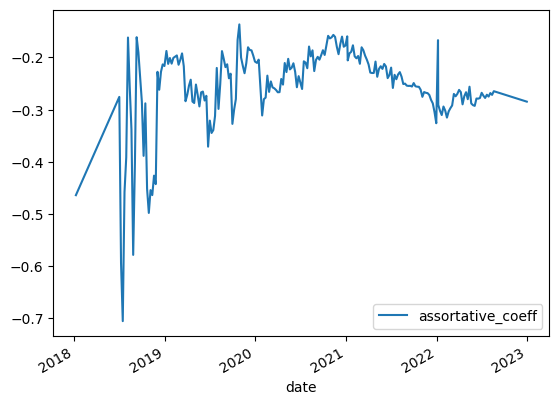

In [12]:
# Determine the date
final['date'] = pd.to_datetime(final.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(final.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
final.plot(x='date', y='assortative_coeff', ax=ax)